<h1>Contents<span class="tocSkip"></span></h1>

<a href='#first'> 1. Examine the data<br/>
<a href='#first_1'> 1.1 Conclusion</a> <br/>

<a href='#second'> 2. Data preprocessing<br/>
<a href='#second_1'> 2.1 Conclusion</a> <br/>

<a href='#third'> 3. Calculations </a> <br/>
<a href='#third_1'> 3.1 Conclusion </a> <br/>
    
<a href='#fourth'> 4. Data mining </a> <br/>
<a href='#fourth_1'>4.1 Conclusion</a> <br/>
    
<a href='#fifth'> 5. General conclusion </a> <br/>

# Apartments sale advertisements research

The data is provided by the real Realty service - an archive of ads for the sale of apartments in the big city and neighboring settlements for several years. 
The task is to learn how to determine the market value of real estate. The aim is to set the parameters. This will allow to build an automated system, which will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

<a id='first'></a>
## 1. Examine the data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
display(data.head()) 
data.info() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<a id='first_1'></a>
### Conclusion

The data contains 22 columns. <br/>
Data is missing in the 13 of them. In columns such as `balcony` and `floors_total`, gaps can be reasoned, respectively, by the fact that there are no balconies and the number of floors matches the floor of the apartment (or a country house, the number of floors will also match the floor of the apartment / house). Such gaps can be replaced: in the `balcony` column with 0 and in `floors_total` with the value of the floor column.
It is recommended to replace gaps in the ceiling height (`ceiling_height`) column with the median (standard construction - the location of apartments is limited to one area). The dependence of gaps in such values as kitchen size (`kitchen_area`) and living area (`living_area`) on other parameters can be analyzed. Most likely, the values will have a strong correlation with the total area of the apartment. Or with the number of rooms and the price. Missing values can be calculated and filled in depending on one of these parameters.<br/>

Gaps in automatically acquired data are suggested to be left unchanged, ex. `days_exposition` - data on the day of the sale may simply be missing, as well as others, since the number of gaps is the same (`parks_around3000`, `ponds_around3000`, (`cityCenters_nearest`, `airports_nearest` - close values) ) and may be due to the lack of cartographic data for such objects.<br/>


Regarding data types: there is a discrepancy between the type of the `is_apartment` column as declared in the project description and as it is: data type is float, while the description suggests boolean type. It is also more logical to convert a number of columns to an integer data type (int) from a floating point data type (float), in columns such as: `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`. This data does not imply a non-integer quantity. As well as the price of an apartment - an apartment is quite an expensive thing, a penny has practically no effect on its value. The data in the `first_day_exposition` column is proposed to be cast to the datetime type. <br/>
It also makes sense to cast all column names to snake case (`cityCenters_nearest` to `city_centers_nearest`).

<a id='second'></a>
## 2. Data preprocessing

In [2]:
#2.1
#Gaps_1
data['balcony']=data['balcony'].fillna(0) 

data['floors_total']=data['floors_total'].where(data['floors_total'].notna(), data['floor']) 

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data.loc[:, ['balcony', 'floors_total', 'ceiling_height']].info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 3 columns):
balcony           23699 non-null float64
floors_total      23699 non-null float64
ceiling_height    23699 non-null float64
dtypes: float64(3)
memory usage: 555.6 KB


In [3]:
#Correlation check
corr_kitchen_total = data['kitchen_area'].corr(data['total_area'])
print('Корреляция_кухня-общая площадь:', corr_kitchen_total)
corr_kitchen_rooms = data['kitchen_area'].corr(data['rooms'])
print('Корреляция_кухня-комнаты:', corr_kitchen_rooms)
corr_kitchen_price = data['kitchen_area'].corr(data['last_price'])
print('Корреляция_кухня-цена:', corr_kitchen_price)
print()

corr_living_total = data['living_area'].corr(data['total_area'])
print('Корреляция_жилая-общая площадь:', corr_living_total)
corr_living_rooms = data['living_area'].corr(data['rooms'])
print('Корреляция_жилая-комнаты:', corr_living_rooms)
corr_living_price = data['living_area'].corr(data['last_price'])
print('Корреляция_жилая-цена:', corr_living_price)
print()


Корреляция_кухня-общая площадь: 0.6091211711198314
Корреляция_кухня-комнаты: 0.26994485416385783
Корреляция_кухня-цена: 0.5198690130216387

Корреляция_жилая-общая площадь: 0.9395373338721491
Корреляция_жилая-комнаты: 0.8459774567888746
Корреляция_жилая-цена: 0.5664915336952648



The correlation coefficient between living space and total space is quite high - 94%. The other two correlations (with the number of rooms and cost) are smaller in value, which means a weaker dependence. It is proposed to replace the gaps in the living area with the values of the total area * coefficient correlations.
The correlation coefficient between the kitchen area and the total area is lower than in the case of the living area, and amounted to only 61%. Since the correlation indicator with the number of rooms and cost is even lower, it is proposed to replace the gaps in the values with the kitchen area also with the total area * coefficient correlations

In [4]:
#Gaps_2
 
data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area'].notna(),data['total_area']*corr_kitchen_total) 
data['living_area'] = data['living_area'].where(data['living_area'].notna(),data['total_area']*corr_living_total) 
data.info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
#2.2
#Types processing
data['is_apartment'] = data['is_apartment'].astype('bool') #bool for is_apartment
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')  #date for first_day_exposition
columns_to_change = ['last_price', 'floors_total', 'balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000'] 
for column in columns_to_change: 
    data[column]=data[column].astype('int', errors = 'ignore' ) #int type, for errors - leave unchanged
    
data.loc[:, ['is_apartment', 'first_day_exposition', 'last_price', 'floors_total', 'balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']].info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 8 columns):
is_apartment            23699 non-null bool
first_day_exposition    23699 non-null datetime64[ns]
last_price              23699 non-null int64
floors_total            23699 non-null int64
balcony                 23699 non-null int64
days_exposition         20518 non-null float64
parks_around3000        18181 non-null float64
ponds_around3000        18181 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3)
memory usage: 1.3 MB


In [6]:
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}) #column name change

<a id='second_1'></a>
### Conclusion

The gaps, data types and column names were replaced/removed according to the conclusion in p.1.

<a id='third'></a>
## 3. Calculations

In order ro move on with data mining, some additions to the data table should be calculated and made, such as:

  - Price per square meter
  - Day of the week for the announcement of the sale
  - Month of the announcement of the sale
  - Year of the announcement of the sale
  - Apartment floor category
  - The ratio of residential and total area
  - The ratio of kitchen area and total area

In [7]:
#3.1
data['price_square_meter'] = (data['last_price'] / data ['total_area']).astype('int') 

#3.2
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday +1 
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year 

#3.3
def floors(data): #categories for the number of floors
        
    floor = data['floor'] 
    total = data['floors_total'] 
    
    if floor == total: 
        return 'последний' 
    elif floor == 1: 
        return 'первый' 
    else:
        return 'другой' 

data['group_floor'] = data.apply(floors, axis=1) 

#3.4
data['living_to_total'] = data['living_area'] / data['total_area'] 
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area'] 

data.head(10) #check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,group_floor,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,True,...,2.0,755.0,NaN,120370,4,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,True,...,0.0,NaN,81.0,82920,2,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,True,...,2.0,574.0,558.0,92785,4,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,149.386436,9,True,...,3.0,234.0,424.0,408176,5,7,2015,другой,0.939537,0.609121
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,True,...,1.0,48.0,121.0,100000,2,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,True,...,NaN,NaN,55.0,95065,1,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.600000,6,True,...,0.0,NaN,155.0,99195,4,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24,67.270873,22,True,...,0.0,NaN,NaN,110544,4,4,2019,другой,0.939537,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.430000,26,True,...,NaN,NaN,189.0,87454,3,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,True,...,0.0,NaN,289.0,88524,7,2,2017,другой,0.714754,0.106557


<a id='third_1'></a>
### Conclusion

New columns have been added to the table:

These columns will be used for further research

<a id='fourth'></a>
## 4. Data mining

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15927 entries, 1 to 23695
Data columns (total 4 columns):
total_area        15927 non-null float64
last_price        15927 non-null int64
rooms             15927 non-null int64
ceiling_height    15927 non-null float64
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


,total_area,last_price,rooms,ceiling_height
1,40.40,3350000,1,2.65
5,30.40,2890000,1,2.65
6,37.30,3700000,1,2.65
8,33.16,2900000,1,2.65
9,61.00,5400000,3,2.50


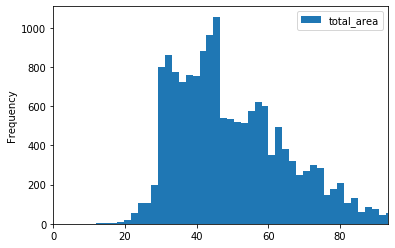

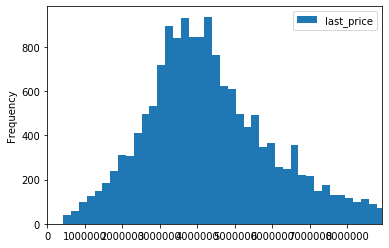

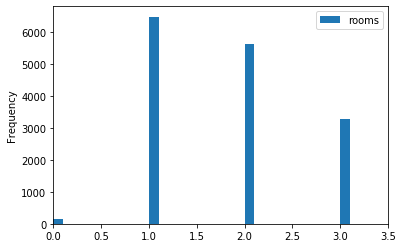

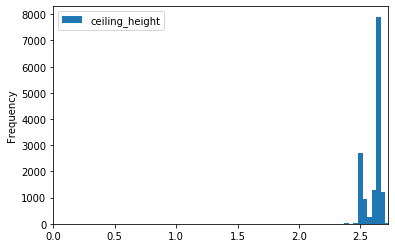

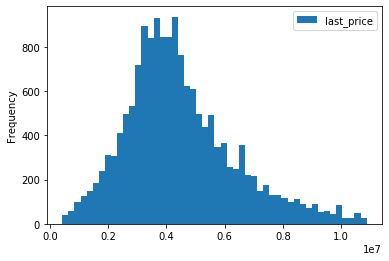

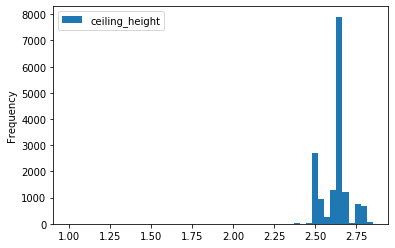

In [33]:
#4.1
columns_to_explore = ['total_area', 'last_price', 'rooms', 'ceiling_height'] 
columns_to_explore_2 = ['last_price', 'ceiling_height'] 

data.loc[:, columns_to_explore].info() 
display(data.loc[:, columns_to_explore].head()) 

for column in columns_to_explore: 
    min_lim = data[column].quantile(0.25)-1.5*(data[column].quantile(0.75)- data[column].quantile(0.25)) #limit for diagram (excluding data outliers)
    max_lim = data[column].quantile(0.75)+1.5*(data[column].quantile(0.75)- data[column].quantile(0.25)) 
    data.plot(y=column, kind='hist', bins=50, subplots=True, xlim=(0, max_lim)) 

for column in columns_to_explore_2: #without limitations
    data.plot(y=column, kind='hist', bins=50, subplots=True) 



In [9]:
data['ceiling_height'].describe() 

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

**Intermediate Conclusion 4.1** <br/>
Histograms above show area, price, number of rooms, ceiling height. The area has a normal distribution of values - there are slightly fewer apartments on small areas and with the increase in the area the number of apartments decreases. With an increase in the price of an apartment, there is a decrease in observations. At the same time, there are not so many unique values in terms of the number of rooms and ceiling heights, and most apartments have 1,2 or 3 rooms and ceiling heights vary from 2.6 to 2.8 meters.

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
7      NaN
8    189.0
9    289.0
Name: days_exposition, dtype: float64

Среднее время продажи квартир: 180.88863436982163
Медианное время продажи квартир  95.0


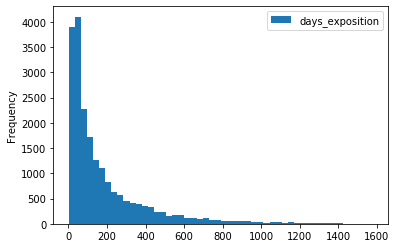

In [10]:
#4.2
display(data['days_exposition'].head(10)) 

data.plot(y='days_exposition', kind='hist', bins=50, subplots=True) 
print('Среднее время продажи квартир:' , data['days_exposition'].mean()) 
print('Медианное время продажи квартир ', data['days_exposition'].median()) 

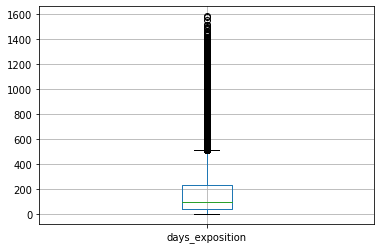

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [11]:
data.boxplot('days_exposition') #boxlot for days_exposition
plt.show() 
data['days_exposition'].describe() #numeric description of the column

In [12]:
data[data['days_exposition']==1]['days_exposition'].count() #outliers - 1 day for a sale

1

In [13]:
days_exposition_delete = data['days_exposition'].quantile(0.75)+1.5*(data['days_exposition'].quantile(0.75)- data['days_exposition'].quantile(0.25)) #calculation of the upper limit of normal values
days_exposition_delete

512.5

**Intermediate Conclusion 4.2** <br/>
On average, apartment sale takes six months (185 days). At the same time, half of the apartments from the data were sold in less than 103 days, and a quarter of the apartments - in less than a month and a half. Such sales can be considered fast, at the same time they do not deviate from the normal and are not abnormal. The fastest sales occurred in 1 day (only 1 apartment). Abnormally long sales can be considered sales that fall outside the normal limits ("whiskers") of the boxlot - i.e. are more than approximately 513 days (1 year and 5 months). It is suggested to delete such values.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96cdc95f50>],
      dtype=object)

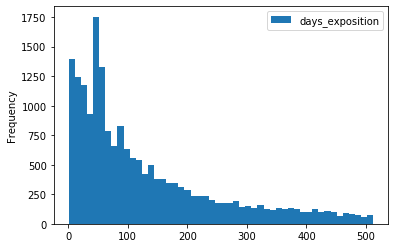

In [14]:
#4.3

data = data.query('days_exposition < @days_exposition_delete') #days_exposition with the condition above
data.plot(y='days_exposition', kind='hist', bins=50, subplots=True) 

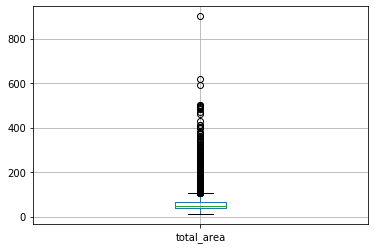

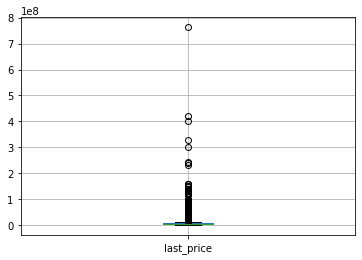

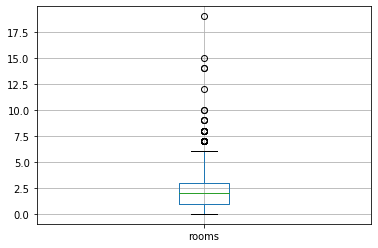

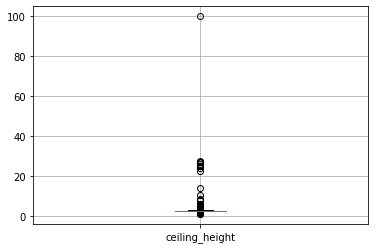

In [15]:
#Do the same operations as above
columns_to_explore = ['total_area', 'last_price', 'rooms', 'ceiling_height'] 

for column in columns_to_explore:
    data.boxplot(column)  
    plt.show() 


In [16]:
total_area_to_delete = data['total_area'].quantile(0.75)+1.5*(data['total_area'].quantile(0.75)- data['total_area'].quantile(0.25))
price_to_delete = data['last_price'].quantile(0.75)+1.5*(data['last_price'].quantile(0.75)- data['last_price'].quantile(0.25))
rooms_to_delete = data['rooms'].quantile(0.75)+1.5*(data['rooms'].quantile(0.75)- data['rooms'].quantile(0.25))
ceiling_to_delete = data['ceiling_height'].quantile(0.75)+1.5*(data['ceiling_height'].quantile(0.75)- data['ceiling_height'].quantile(0.25))
#calculation of the upper limit of normal values
price_to_delete

10890000.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96cde46390>],
      dtype=object)

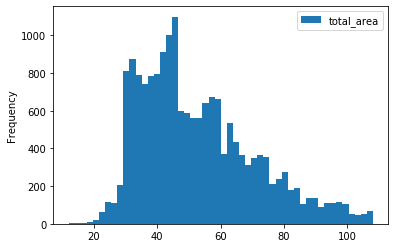

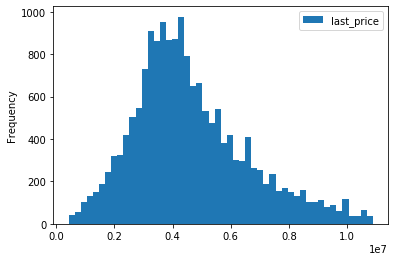

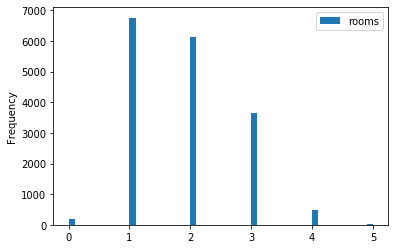

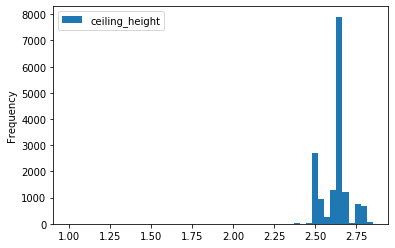

In [17]:
data = data.query('total_area < @total_area_to_delete') 
data.plot(y='total_area', kind='hist', bins=50, subplots=True)

data = data.query('last_price < @price_to_delete') 
data.plot(y='last_price', kind='hist', bins=50, subplots=True) 

data = data.query('rooms < @rooms_to_delete') 
data.plot(y='rooms', kind='hist', bins=50, subplots=True)

data = data.query('ceiling_height < @ceiling_to_delete') 
data.plot(y='ceiling_height', kind='hist', bins=50, subplots=True) 

**Intermediate Conclusion 4.3** <br/>
Outliers have been removed from `days_exposition`, `total_area`, `last_price`, `rooms`, `ceiling_height`.

In [18]:
#4.4
columns_corr = ['total_area', 'rooms', 'city_centers_nearest'] #columns for correlations check
for column in columns_corr: 
    print(column, data['last_price'].corr(data[column])) #corr with price

total_area 0.6714778768433569
rooms 0.4119885017913099
city_centers_nearest -0.3013678692762161


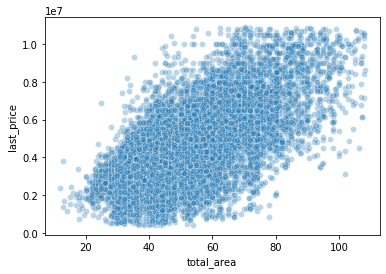

In [19]:
sns.scatterplot(data=data, x='total_area', y="last_price", alpha=0.3) 

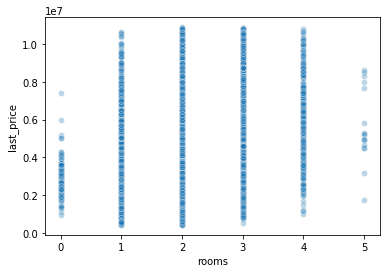

In [20]:
sns.scatterplot(data=data, x='rooms', y="last_price", alpha=0.3) 

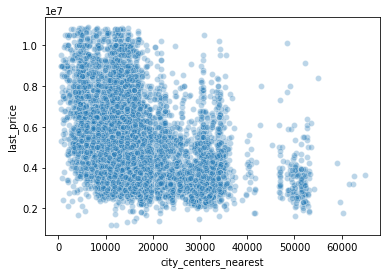

In [21]:
sns.scatterplot(data=data, x='city_centers_nearest', y="last_price", alpha=0.3) 

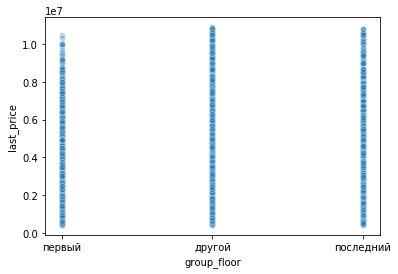

In [22]:
sns.scatterplot(data=data, x="group_floor", y="last_price", alpha=0.3) 

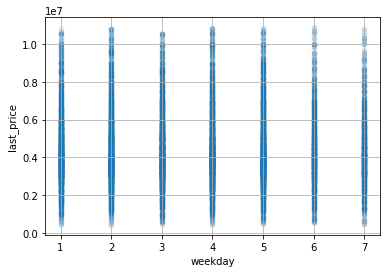

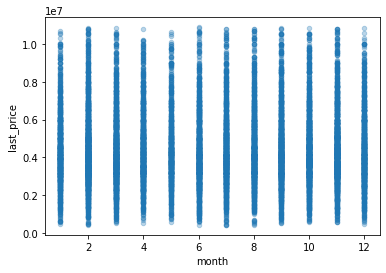

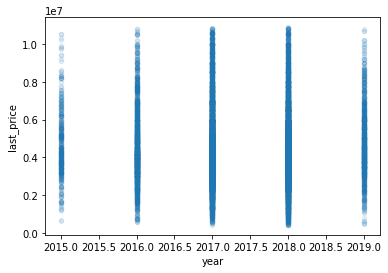

In [23]:
data.plot(kind='scatter', x='weekday', y='last_price', grid=True, alpha=0.1) 
data.plot(kind='scatter', x='month', y='last_price', alpha=0.3) 
data.plot(kind='scatter', x='year', y='last_price', alpha=0.1) 

**Intermediate conclusion 4.4** <br/>
From the correlation values and the graphs above, the following conclusion can be drawn:
1) The dependence of the price on the area of the apartment is direct and quite high (about 70%), the more the apartment, the higher the price. <br/>
2) At the same time, the number of rooms also affects the cost of an apartment in a similar way, but the dependence of the parameters is not so strong (only about 40%).<br/>
3) Distance from the center affects the cost of the apartment, but not significantly - the farther from the center, the lower the price (slightly more than 20% dependence).<br/>
4) The number of storeys of the apartment has a great influence. Apartments on the ground floor are cheaper than apartments on the floors above. <br/>
5) The dependence of the cost on the day of the week the sale of the apartment is insignificant - traditionally, a little more apartments were sold higher in price if the announcement was at the beginning of the week (Monday and Tuesday), but the most expensive sales occurred on Saturday and Wednesday. On Sunday, apartments were mostly sold cheaper. <br/>
6) By months, the influence of June, November and February is noticeable - more apartments were sold at a higher price, and the most inactive months for expensive apartments are January and May (months with holidays). At the same time, the most expensive apartments were bought in December and February. <br/>
7) Sales with higher prices for apartments were in 2017, there is a slight decline in prices in 2016 and 2018, while in 2019 and 2014-2015 more cheaper apartments were sold. <br/>
It is important to note that points 5-7 analyze the date of placement of the ad, and not the date of sale.

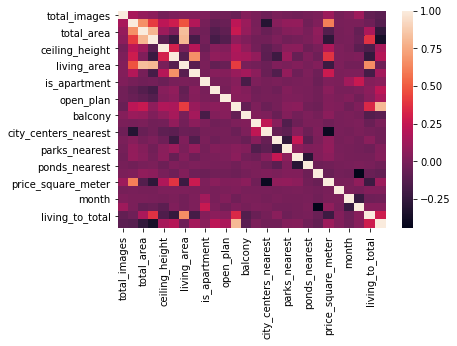

In [24]:
data_corr = data.corr() #correlation matrix
sns.heatmap(data_corr) #graphically

In [25]:
#4.5
top_10 = data.pivot_table(index='locality_name', values= 'price_square_meter', aggfunc= ('count','mean')).sort_values(by='count', ascending=False).head(10) #pivot table (grouping) by city with price values per square meter, counting the number of ads and average price, sorted in descending order with the first 10 rows displayed
top_10

,count,mean
locality_name,,
Санкт-Петербург,9886.0,103239.032672
посёлок Мурино,480.0,86043.358333
посёлок Шушары,380.0,77935.644737
Всеволожск,293.0,66474.911263
посёлок Парголово,286.0,89429.562937
Колпино,276.0,74682.076087
деревня Кудрово,265.0,92690.241509
Пушкин,234.0,98641.076923
Гатчина,227.0,67859.339207


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96d6b57e50>],
      dtype=object)

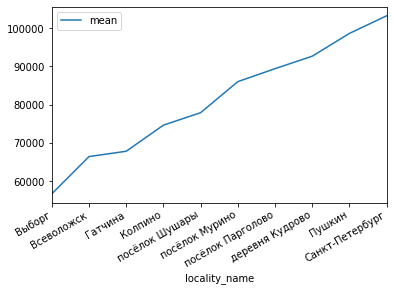

In [26]:
top_10.sorted = top_10.sort_values(by='mean') #sort top-10

top_10.sorted.plot(y='mean', subplots = True) 


**Intermediate Conclusion 4.5** <br/>
Among the 10 settlements with the largest number of sales, the highest price per square meter is in St. Petersburg (103 thousand rubles), and the lowest is in Vyborg (57 thousand rubles).

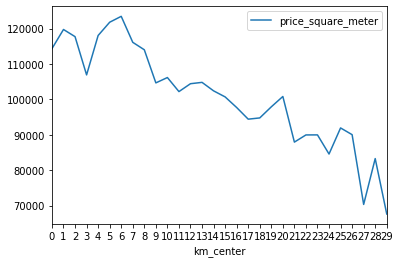

In [27]:
#4.6
data_spb=data[data['locality_name']=='Санкт-Петербург'] #analyze St. Petersburg
data_spb = data_spb.dropna(subset = ['city_centers_nearest']).reset_index(drop= True) 
data_spb['km_center'] = (data_spb['city_centers_nearest']/1000).round(0).astype('int') 
data_spb.head() #check
data_spb.pivot_table(index='km_center', values='price_square_meter').plot(xticks=data_spb['km_center'].sort_values().unique()) #pivot table for kilometers and price values per meter (average by default) and plotting

**Intermediate conclusion 4.6** <br/>
The graph changes around 2 km - the price per meter for 3 km is much lower. Thus, the center is limited to 2 km. In the area of 6 km from the center and 20 km from the center, the price per meter increases significantly again. A possible reason may be the location of prestigious areas at a given distance from the center.

In [28]:
#4.7
data_spb_center = data_spb[data_spb['km_center']<3] #analyze city center
data_spb_center.loc[:, ['total_area', 'rooms', 'city_centers_nearest', 'ceiling_height','last_price']].info()
columns_corr_2 = ['total_area', 'rooms', 'city_centers_nearest', 'ceiling_height'] 

for column in columns_corr_2: 
    print(column, 'center', data_spb_center['last_price'].corr(data_spb_center[column])) 

for column in columns_corr_2: 
    print(column, data_spb['last_price'].corr(data_spb[column])) 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 5 to 9837
Data columns (total 5 columns):
total_area              100 non-null float64
rooms                   100 non-null int64
city_centers_nearest    100 non-null float64
ceiling_height          100 non-null float64
last_price              100 non-null int64
dtypes: float64(3), int64(2)
memory usage: 4.7 KB
total_area center 0.7492544671048892
rooms center 0.6291415213569649
city_centers_nearest center -0.059212931025103055
ceiling_height center -0.07376327174294736
total_area 0.7878766970079861
rooms 0.48179640566322496
city_centers_nearest -0.26738992829803415
ceiling_height 0.2544823101793702


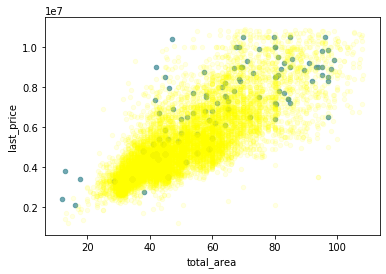

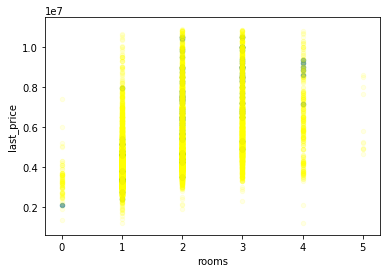

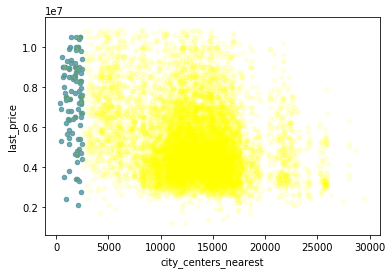

In [29]:
ax1 = data_spb_center.plot(kind='scatter', x='total_area', y='last_price', alpha=0.7) 
ax2 = data_spb_center.plot(kind='scatter', x='rooms', y='last_price', alpha=0.7) 
ax3 = data_spb_center.plot(kind='scatter', x='city_centers_nearest', y='last_price', alpha=0.7) 

data_spb.plot(kind='scatter', x='total_area', y='last_price', alpha=0.1, ax=ax1,color='yellow') 
data_spb.plot(kind='scatter', x='rooms', y='last_price', alpha=0.1, ax=ax2, color='yellow') 
data_spb.plot(kind='scatter', x='city_centers_nearest', y='last_price', alpha=0.1, ax=ax3, color='yellow') 

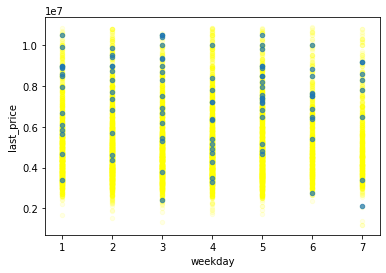

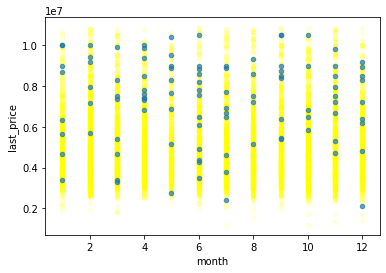

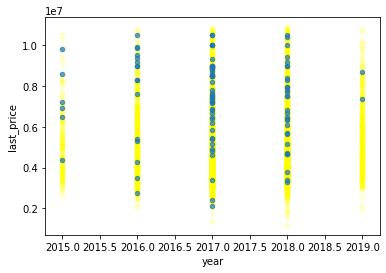

In [30]:
ax4 = data_spb.plot(kind='scatter', x='weekday', y='last_price', alpha=0.1, color='yellow') 
ax5 = data_spb.plot(kind='scatter', x='month', y='last_price', alpha=0.1, color='yellow') 
ax6 = data_spb.plot(kind='scatter', x='year', y='last_price', alpha=0.1, color='yellow') 

data_spb_center.plot(kind='scatter', x='weekday', y='last_price', alpha=0.7, ax=ax4)  
data_spb_center.plot(kind='scatter', x='month', y='last_price', alpha=0.7, ax=ax5) 
data_spb_center.plot(kind='scatter', x='year', y='last_price', alpha=0.7, ax=ax6) 
 


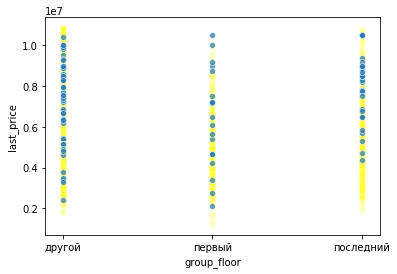

In [31]:
sns.scatterplot(data=data_spb, x="group_floor", y="last_price", alpha=0.1, color='yellow') 
sns.scatterplot(data=data_spb_center, x="group_floor", y="last_price", alpha=0.7) 

**Intermediate conclusion 4.7** <br/>
In general, the dependence of the price of an apartment on a number of factors corresponds to the conclusions made in paragraph 4.4. At the same time, the price of apartments in the center depends less on the total area, and slightly more on the number of rooms than in the city as a whole (72% and 53% versus 79% and 49%). At the same time, the height of the ceiling has a slight, but greater effect. The distance from the center in this case also has a negative correlation, however, it makes no sense to analyze the dependence by the correlation coefficient in this case, since, as described in paragraph 4.6, the values per square meter unexpectedly increase dramatically by 6th and 20th km , although in general the price per meter tends to decrease with the increase of distance from the city center. The last and first floors of an apartment have a more negative impact in the city center than in the city as a whole. At the same time, there is no significant difference in the date of placement of the announcement.

<a id='fourth_1'></a>
### Conclusion

A number of analytical studies were carried out in order to find out which factors influence the price of apartments and on the fact how long apartments are being sold. The conclusions for each item are specifically explained above.

<a id='fifth'></a>
## 5. General conclusion

The following parameters have the main influence on the price of an apartment:

- Locality
- Square
- Distance to the center
- Number of rooms (to a lesser extent)
- Number of storeys - the first floor is usually sold at a slightly lower cost, while the last floor can be sold more expensively

The date the announcement was posted, did not have a significant impact.

On average, an apartment is sold within the six months from the date of the announcement of the sale. At the same time, 50% will be sold even faster - in 102 days.